In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
topix_data = pd.read_csv("./toyota.csv", encoding="shift-jis",index_col='日付')

In [3]:
topix_data.index = pd.to_datetime(topix_data.index)

In [4]:
topix_data.index = topix_data.index.tz_localize('Asia/Tokyo')

In [5]:
topix_data.index = topix_data.index + pd.Timedelta('0 days 8:00:00')

In [6]:
usdjpy_data = pd.read_csv("USDJPY2.csv", encoding="UTF-8",index_col="日付")

In [7]:
usdjpy_data.index = pd.to_datetime(usdjpy_data.index)

In [8]:
usdjpy_data.index=usdjpy_data.index.tz_localize('US/Eastern')

In [9]:
usdjpy_data.index = usdjpy_data.index + pd.Timedelta('0 days 16:00:00')

In [10]:
usdjpy_data.index =usdjpy_data.index.tz_convert('Asia/Tokyo')

In [11]:
topix_data.index = topix_data.index.strftime("%Y/%m/%d")

In [12]:
usdjpy_data.index = usdjpy_data.index.strftime("%Y/%m/%d")

In [13]:
merge = pd.merge(topix_data,usdjpy_data,left_index=True,right_index=True)

In [14]:
merge.head()

,始値_x,高値_x,安値_x,終値_x,出来高,終値調整値,終値_y,始値_y,高値_y,安値_y,前比%
2000/01/04,4990,5000,4860,4940,2229000,4940,101.59,102.11,102.18,101.31,-0.66%
2000/01/05,4690,4900,4670,4890,5388000,4890,103.27,101.46,103.28,101.40,1.65%
2000/01/06,4810,4850,4390,4390,5653000,4390,104.29,103.28,104.40,102.76,0.99%
2000/01/07,4350,4570,4260,4430,4818000,4430,105.33,104.32,105.55,103.97,1.00%
2000/01/11,4680,4720,4600,4620,4164000,4620,105.11,105.12,105.39,104.30,-0.24%


In [15]:
merge=merge[['始値_x','終値_y']]

In [16]:
merge.columns = ['TOPIX', 'EXCH']

In [17]:
merge.head()

,TOPIX,EXCH
2000/01/04,4990,101.59
2000/01/05,4690,103.27
2000/01/06,4810,104.29
2000/01/07,4350,105.33
2000/01/11,4680,105.11


時系列解析は弱定常性を仮定しているので、計算を行う前にlogをとってdiffを取る処理を行う

In [18]:
merge['TOPIX'] =np.log(merge['TOPIX'])

In [19]:
merge['EXCH'] =np.log(merge['EXCH'])

In [20]:
merge['TOPIX'] =merge['TOPIX'].diff()

In [21]:
merge['EXCH'] =merge['EXCH'].diff()

In [22]:
merge.dropna(inplace=True)

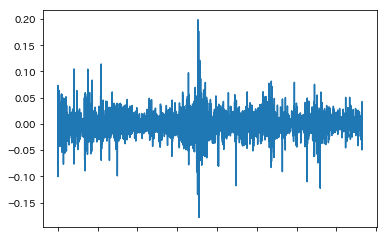

In [23]:
merge['TOPIX'].plot()

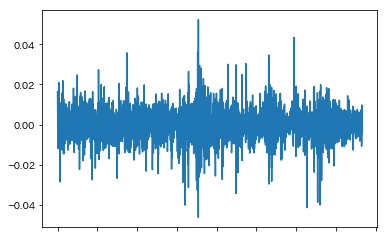

In [24]:
merge['EXCH'].plot()

In [25]:
merge.tail()

,TOPIX,EXCH
2018/12/21,-0.040914,-0.010726
2018/12/25,-0.049600,-0.007487
2018/12/26,-0.007477,-0.001540
2018/12/27,0.042328,0.009746
2018/12/28,-0.004546,-0.003238


In [26]:
merge0013= merge['2000-01-05':'2013-10-31']

In [27]:
merge0007= merge['2000-01-05':'2007-12-31']

In [28]:
merge0813= merge['2008-01-04':'2013-10-31']

In [29]:
merge1418= merge['2014-01-04':'2018-12-31']

In [30]:
def GrangerTest(data):
    var=[]
    for i in range(11):
        var.append(VAR(data).fit(maxlags=i,ic='aic'))
        
    aic=[]    
    for i in range(11):
        aic.append(var[i].aic)
    AIC = pd.Series(aic,index=range(11),name='AIC')

    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[AIC.idxmin()].test_causality(i,j,kind='f',signif=0.05)
                print(test.causing,  ' --> ', test.caused ) 
                print('pvalue:',test.pvalue)
            else:
                pass

In [31]:
GrangerTest(merge0013)

C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueW

['EXCH']  -->  ['TOPIX']
pvalue: 0.14703796939673522
['TOPIX']  -->  ['EXCH']
pvalue: 0.005194077171460865


In [32]:
GrangerTest(merge0007)

C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueW

['EXCH']  -->  ['TOPIX']
pvalue: 0.001811115030806911
['TOPIX']  -->  ['EXCH']
pvalue: 0.07756077634491426


C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
GrangerTest(merge0813)

C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueW

['EXCH']  -->  ['TOPIX']
pvalue: 0.7557932008444372
['TOPIX']  -->  ['EXCH']
pvalue: 0.3619722379504706


C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [34]:
GrangerTest(merge1418)

C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueW

['EXCH']  -->  ['TOPIX']
pvalue: 0.09758163530231104
['TOPIX']  -->  ['EXCH']
pvalue: 0.04121365256214846


C:\Users\stsda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
